In [ ]:
!pip install 'aif360[LFR]'

     |████████████████████████████████| 175 kB 5.3 MB/s 
     |████████████████████████████████| 564 kB 32.7 MB/s 
  Created wheel for memory-profiler: filename=memory_profiler-0.60.0-py3-none-any.whl size=31284 sha256=b96f302c32a9d0121af2656cc413eea5eed8c88fd9094f489fa8bc3602963348
  Stored in directory: /root/.cache/pip/wheels/67/2b/fb/326e30d638c538e69a5eb0aa47f4223d979f502bbdb403950f
Successfully built memory-profiler


In [ ]:
cd /usr/local/lib/python3.7/dist-packages/aif360/data/raw/adult

/usr/local/lib/python3.7/dist-packages/aif360/data/raw/adult


In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test

--2022-05-12 18:04:16--  https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3974305 (3.8M) [application/x-httpd-php]
Saving to: ‘adult.data’

adult.data          100%[===================>]   3.79M  9.18MB/s    in 0.4s    

2022-05-12 18:04:16 (9.18 MB/s) - ‘adult.data’ saved [3974305/3974305]

--2022-05-12 18:04:16--  https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5229 (5.1K) [application/x-httpd-php]
Saving to: ‘adult.names’

adult.names         100%[===================>]   5.11K  --.-KB/s    in 0s      

2022-

In [ ]:
!pip install fairlearn

     |████████████████████████████████| 177 kB 5.3 MB/s 


In [ ]:
#Importing the necessary libraries.
import pandas as pd
import numpy as np
from aif360.datasets import AdultDataset
from aif360.algorithms.preprocessing.optim_preproc_helpers.data_preproc_functions import load_preproc_data_adult
from aif360.algorithms.preprocessing.optim_preproc_helpers.data_preproc_functions import load_preproc_data_german
from aif360.metrics import ClassificationMetric
from aif360.algorithms.preprocessing.reweighing import Reweighing
import pdb
from sklearn.preprocessing import StandardScaler , MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import *
import matplotlib.pyplot as plt

np.random.seed(0)

# Task 1 Adult Data

In [ ]:
pd.read_csv('adult.data')

,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [ ]:
#Setting the privilaged and unprevilaged groups.

privileged_groups = [{'sex': 1}]
unprivileged_groups = [{'sex': 0}]
dataset_orig = load_preproc_data_adult(['sex'])

#split between training and test set.
train, test = dataset_orig.split([0.7], shuffle=True)
print("training data size", train.features.shape)
print("dataset feature names", train.feature_names)


training data size (34189, 18)
dataset feature names ['race', 'sex', 'Age (decade)=10', 'Age (decade)=20', 'Age (decade)=30', 'Age (decade)=40', 'Age (decade)=50', 'Age (decade)=60', 'Age (decade)=>=70', 'Education Years=6', 'Education Years=7', 'Education Years=8', 'Education Years=9', 'Education Years=10', 'Education Years=11', 'Education Years=12', 'Education Years=<6', 'Education Years=>12']


In [ ]:
dataset_orig

               instance weights features                                      \
                                         protected attribute                   
                                    race                 sex Age (decade)=10   
instance names                                                                 
0                           1.0      0.0                 1.0             0.0   
1                           1.0      1.0                 1.0             0.0   
2                           1.0      1.0                 1.0             0.0   
3                           1.0      0.0                 1.0             0.0   
4                           1.0      1.0                 0.0             1.0   
...                         ...      ...                 ...             ...   
48837                       1.0      1.0                 0.0             0.0   
48838                       1.0      1.0                 1.0             0.0   
48839                       1.0      1.0

In [ ]:
#A custom cross validation function is defined which returns the avearage accuracy and average equal oppertunity fairness matric in a dictionary for each value of the 'C' value of the logistic regression.
#By default the number of folds for cross validation is set as 5

def  custom_cross_validation(train_obj,folds = 5,a=0, b=-10, c=15):


  folds = 5 # number of folds to validate 
  kf = KFold(n_splits = folds, shuffle = True, random_state =1)#Setting random state so the folds created will be the same every time

  #Creating the folds of the train objects and validation objects (5 folds each) for the validation purpose
  train_folds = []
  corresponding_validator_folds = []
  for train_index,validator_index in kf.split(train_obj.features):#For each set of train index and the vlaidator index, taking the corresponding train and validation object and appending it to the train_folds and corresponding_validator folds list
    train_folds.append(train_obj.subset(train_index))
    corresponding_validator_folds.append(train_obj.subset(validator_index))


  C_values = np.logspace(a,b,c) #values of the 'C' to be considered in log space

  dict_ = {'accuracy': [], 'eq_opp_diff' : [] } #Dictionary defined to hold the average accuracy and fairness metric value for each 5 fold validation

  for i in C_values:
    model = LogisticRegression(solver='liblinear',random_state = 1, C = i)


    Accuracy = []
    
    Eq_opp_diff = []
    
    
    #training and validating in 5 folds
    for fold in range(len(train_folds)):
      scale_orig = StandardScaler()
      X_train_ = scale_orig.fit_transform(train_folds[fold].features)
      y_train_ = train_folds[fold].labels.ravel()

      X_test_ = scale_orig.transform(corresponding_validator_folds[fold].features) 
      y_test_ = corresponding_validator_folds[fold].labels.ravel()
      

      model.fit(X_train_,y_train_)
      predictions = model.predict(X_test_)
      
      test_pred_ = corresponding_validator_folds[fold].copy()
      test_pred_.labels = predictions

      accuracy = sum(predictions == y_test_)/len(y_test_)
      Accuracy.append(accuracy)
      
    
      #Classification metric object defined
      metric = ClassificationMetric(corresponding_validator_folds[fold], test_pred_, unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)

    
      Eq_opp_diff.append(metric.equal_opportunity_difference())

    

      
      
    #The lists are converted to numpy array so that directly mean can be calculated
    Acc = np.asarray(Accuracy)
  
    eod = np.asarray(Eq_opp_diff)
    
    #Appending mean values of accuracy and fairness metric for each C value.
    dict_['accuracy'].append(np.mean(Acc))
    
    dict_['eq_opp_diff'].append(np.mean(eod))


  return dict_, C_values
  


In [ ]:
dict_metric ,c_val = custom_cross_validation(train,folds = 5)#cross validating the data

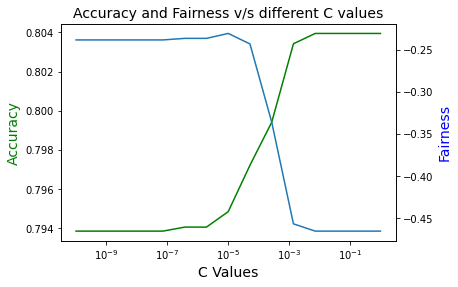

In [ ]:
#Creating plot for how accuracy and fairness varies with the 'C' values
fig,ax = plt.subplots()
ax.plot(c_val,dict_metric['accuracy'], color = 'green')
plt.xscale('log')
ax.set_xlabel('C Values', fontsize = 14)
ax.set_ylabel('Accuracy',color = 'green', fontsize = 14)
ax2 = ax.twinx()
ax2.plot(c_val,dict_metric['eq_opp_diff'])
ax2.set_ylabel('Fairness',color = 'blue', fontsize = 14)
plt.title('Accuracy and Fairness v/s different C values', fontsize = 14)

plt.show()



In [ ]:
dict_metric

{'accuracy': [0.8039427862340653,
  0.8039427862340653,
  0.8039427862340653,
  0.8039427862340653,
  0.8034163122281285,
  0.7994090359549829,
  0.7972154120883552,
  0.7948462041975807,
  0.7940564996055948,
  0.7940564996055948,
  0.7938517613780428,
  0.7938517613780428,
  0.7938517613780428,
  0.7938517613780428,
  0.7938517613780428],
 'eq_opp_diff': [-0.4657143725487554,
  -0.4657143725487554,
  -0.4657143725487554,
  -0.4657143725487554,
  -0.45707589303768364,
  -0.3360730649215088,
  -0.243088609121628,
  -0.23060303341214533,
  -0.23646667151143017,
  -0.23646667151143017,
  -0.23831720531925935,
  -0.23831720531925935,
  -0.23831720531925935,
  -0.23831720531925935,
  -0.23831720531925935]}

In [ ]:
c_val[7]

1e-05

The model with highest accuracy has c value = 1,


The model with highest fairness has c value = 0.00001

In [ ]:
#General function defined to train the model with the required parameter 'C'; returns accuracy and TPR difference(fairness)
def test_hyper_par(x):
  model = LogisticRegression(solver = 'liblinear', random_state = 1, C = x)

  scale_orig = StandardScaler()
  X_train = scale_orig.fit_transform(train.features)
  y_train = train.labels.ravel()

  X_test = scale_orig.transform(test.features) 
  y_test = test.labels.ravel()

  model.fit(X_train,y_train)
  predictions = model.predict(X_test)

  test_pred = test.copy()
  test_pred.labels = predictions

  accuracy = sum(predictions==y_test)/len(y_test)

  metric = ClassificationMetric(test, test_pred, unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)

  eq_opp_diff = (metric.equal_opportunity_difference())

  return accuracy,eq_opp_diff


In [ ]:
#calculating accuracy and fairness(TPR difference) for the model with highest accuracy
a,f = test_hyper_par(1)#passing C value corresponding to highest accuracy
print('Accuracy : {} \nFairness : {}'.format(a,f))

Accuracy : 0.8042039172865625 
Fairness : -0.4414141414141414


In [ ]:
#Calculating accuracy and fairness(TPR difference) for the model with highest Fairness
a,f = test_hyper_par(0.00001)#passing c value corresponding to highest fairness metric
print('Accuracy : {} \nFairness : {}'.format(a,f))


Accuracy : 0.7975841124684365 
Fairness : -0.2189742958035641


# Task 2 Adult Data

In [ ]:
#Instance weights before Reweighing
train.instance_weights

array([1., 1., 1., ..., 1., 1., 1.])

In [ ]:
def  custom_cross_validation_with_reweighing(train_obj,folds = 5,a=0, b=-10, c=15):


  folds = 5 # number of folds to validate 
  kf = KFold(n_splits = folds, shuffle = True, random_state =1)#Setting random state so the folds created will be the same every time

  #Creating the folds of the train objects and validation objects (5 folds each) for the validation purpose
  train_folds = []
  corresponding_validator_folds = []
  for train_index,validator_index in kf.split(train_obj.features):#For each set of train index and the vlaidator index, taking the corresponding train and validation object and appending it to the train_folds and corresponding_validator folds list
    train_folds.append(train_obj.subset(train_index))
    corresponding_validator_folds.append(train_obj.subset(validator_index))


  C_values = np.logspace(a,b,c) #values of the 'C' to be considered in log space

  dict_ = {'accuracy': [], 'eq_opp_diff' : [] } #Dictionary defined to hold the average accuracy and fairness metric value for each 5 fold validation

  for i in C_values:
    model = LogisticRegression(solver='liblinear',random_state = 1, C = i)


    Accuracy = []
    
    Eq_opp_diff = []
    
    
    #training and validating in 5 folds
    for fold in range(len(train_folds)):
      scale_orig = StandardScaler()
      X_train_ = scale_orig.fit_transform(train_folds[fold].features)
      y_train_ = train_folds[fold].labels.ravel()

      X_test_ = scale_orig.transform(corresponding_validator_folds[fold].features) 
      y_test_ = corresponding_validator_folds[fold].labels.ravel()

      RW = Reweighing(unprivileged_groups=unprivileged_groups,privileged_groups=privileged_groups)

      train_fold_reweighed = RW.fit_transform(train_folds[fold])
                
      model.fit(X_train_,y_train_,sample_weight=train_fold_reweighed.instance_weights)
      predictions = model.predict(X_test_)
      
      test_pred_ = corresponding_validator_folds[fold].copy()
      test_pred_.labels = predictions

      accuracy = sum(predictions == y_test_)/len(y_test_)
      Accuracy.append(accuracy)
      
    
      #Classification metric object defined
      metric = ClassificationMetric(corresponding_validator_folds[fold], test_pred_, unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)

    
      Eq_opp_diff.append(metric.equal_opportunity_difference())

    

      
      
    #The lists are converted to numpy array so that directly mean can be calculated
    Acc = np.asarray(Accuracy)
  
    eod = np.asarray(Eq_opp_diff)
    
    #Appending mean values of accuracy and fairness metric for each C value.
    dict_['accuracy'].append(np.mean(Acc))
    
    dict_['eq_opp_diff'].append(np.mean(eod))


  return dict_, C_values

In [ ]:
dict_metric , c_val = custom_cross_validation_with_reweighing(train)#Doing Cross Validation

In [ ]:
dict_metric

{'accuracy': [0.7896983590183363,
  0.7896983590183363,
  0.7896983590183363,
  0.7896983590183363,
  0.7896983590183363,
  0.7896983590183363,
  0.7890548960174588,
  0.7865394251458449,
  0.7864809285094014,
  0.7864809285094014,
  0.7864809285094014,
  0.7864809285094014,
  0.7864809285094014,
  0.7864809285094014,
  0.7864809285094014],
 'eq_opp_diff': [-0.010798338894180548,
  -0.010798338894180548,
  -0.010798338894180548,
  -0.010798338894180548,
  -0.010798338894180548,
  -0.010798338894180548,
  -0.007455893215968445,
  -0.0019002020841960344,
  -0.0029552411870439,
  -0.0029552411870439,
  -0.0029552411870439,
  -0.0029552411870439,
  -0.0029552411870439,
  -0.0029552411870439,
  -0.0029552411870439]}

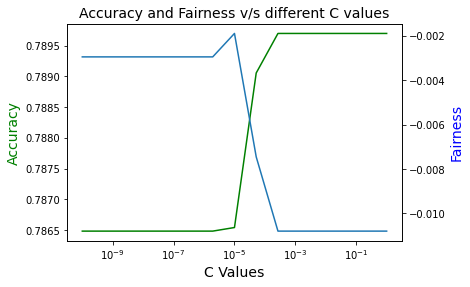

In [ ]:
#Creating plot for how accuracy and fairness varies with the 'C' values
fig,ax = plt.subplots()
ax.plot(c_val,dict_metric['accuracy'], color = 'green')
plt.xscale('log')
ax.set_xlabel('C Values', fontsize = 14)
ax.set_ylabel('Accuracy',color = 'green', fontsize = 14)
ax2 = ax.twinx()
ax2.plot(c_val,dict_metric['eq_opp_diff'])
ax2.set_ylabel('Fairness',color = 'blue', fontsize = 14)
plt.title('Accuracy and Fairness v/s different C values', fontsize = 14)

plt.show()


Even after reweighing,
The model with highest accuracy has c value = 1,

The model with highest fairness has c value = 0.00001

In [ ]:
#General function defined to train the model with the required parameter 'C' with reweighing; returns accuracy and TPR difference(fairness)
def test_hyper_par_reweighing(x):
  model = LogisticRegression(solver = 'liblinear', random_state = 1, C = x)

  scale_orig = StandardScaler()
  X_train = scale_orig.fit_transform(train.features)
  y_train = train.labels.ravel()

  X_test = scale_orig.transform(test.features) 
  y_test = test.labels.ravel()

  RW = Reweighing(unprivileged_groups=unprivileged_groups,privileged_groups=privileged_groups)# Reweighing the train data

  train_fold_reweighed = RW.fit_transform(train)

  model.fit(X_train,y_train,sample_weight=train_fold_reweighed.instance_weights)#The sample weights are set as the instance weights of the train data
  predictions = model.predict(X_test)

  test_pred = test.copy()
  test_pred.labels = predictions

  accuracy = sum(predictions==y_test)/len(y_test)#accuray

  metric = ClassificationMetric(test, test_pred, unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)

  eq_opp_diff = (metric.equal_opportunity_difference())#fairness metric value

  return accuracy,eq_opp_diff

In [ ]:
#calculating accuracy and fairness(TPR difference) for the model with highest accuracy (reweighed)
a,f = test_hyper_par_reweighing(1)#passing C value corresponding to highest accuracy
print('Accuracy : {} \nFairness : {}'.format(a,f))

Accuracy : 0.7905548351873336 
Fairness : 0.03513180586351322


In [ ]:
#calculating accuracy and fairness(TPR difference) for the model with highest fairness (reweighed)
a,f = test_hyper_par_reweighing(0.00001)#passing C value corresponding to highest fairness metric
print('Accuracy : {} \nFairness : {}'.format(a,f))

Accuracy : 0.7876202825359995 
Fairness : 0.03327174180832715


# Task 1 German Data

In [ ]:
cd /usr/local/lib/python3.7/dist-packages/aif360/data/raw/german

/usr/local/lib/python3.7/dist-packages/aif360/data/raw/german


In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.doc


--2022-05-12 18:05:21--  https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 79793 (78K) [application/x-httpd-php]
Saving to: ‘german.data’

german.data         100%[===================>]  77.92K  --.-KB/s    in 0.1s    

2022-05-12 18:05:22 (773 KB/s) - ‘german.data’ saved [79793/79793]

--2022-05-12 18:05:22--  https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.doc
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4679 (4.6K) [application/x-httpd-php]
Saving to: ‘german.doc’

german.doc          100%[===================>]   4.57K  --.-KB/s    in 0s  

In [ ]:
privileged_groups = [{'age': 1}]
unprivileged_groups = [{'age': 0}]
dataset_orig = load_preproc_data_german(['age'])

In [ ]:
dataset_orig

               instance weights            features                            \
                                protected attribute                             
                                                age  sex credit_history=Delay   
instance names                                                                  
0                           1.0                 1.0  1.0                  0.0   
1                           1.0                 0.0  0.0                  0.0   
2                           1.0                 1.0  1.0                  0.0   
3                           1.0                 1.0  1.0                  0.0   
4                           1.0                 1.0  1.0                  1.0   
...                         ...                 ...  ...                  ...   
995                         1.0                 1.0  0.0                  0.0   
996                         1.0                 1.0  1.0                  0.0   
997                         

In [ ]:
dataset_orig.feature_names

['age',
 'sex',
 'credit_history=Delay',
 'credit_history=None/Paid',
 'credit_history=Other',
 'savings=500+',
 'savings=<500',
 'savings=Unknown/None',
 'employment=1-4 years',
 'employment=4+ years',
 'employment=Unemployed']

In [ ]:
#Splitting the german data to  train and test in 0.7 ratio
train, test = dataset_orig.split([0.7], shuffle=True)


In [ ]:
dict_metric ,c_val = custom_cross_validation(train,folds = 5)#Doing cross validation

In [ ]:
dict_metric

{'accuracy': [0.6885714285714286,
  0.6885714285714286,
  0.6900000000000001,
  0.6928571428571428,
  0.6900000000000001,
  0.6599999999999999,
  0.6542857142857141,
  0.6542857142857141,
  0.6542857142857141,
  0.6542857142857141,
  0.6542857142857141,
  0.6542857142857141,
  0.6542857142857141,
  0.6542857142857141,
  0.6542857142857141],
 'eq_opp_diff': [-0.24930385213150955,
  -0.24930385213150955,
  -0.2883988747559439,
  -0.38972998560806565,
  -0.3675077633858434,
  -0.3335440511144096,
  -0.3801711082677825,
  -0.37776146971356567,
  -0.37776146971356567,
  -0.37776146971356567,
  -0.37776146971356567,
  -0.37776146971356567,
  -0.37776146971356567,
  -0.37776146971356567,
  -0.37776146971356567]}

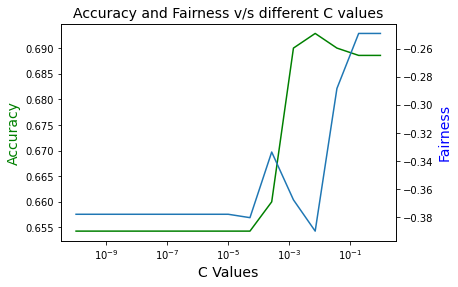

In [ ]:
#Creating plot for how accuracy and fairness varies with the 'C' values
fig,ax = plt.subplots()
ax.plot(c_val,dict_metric['accuracy'], color = 'green')
plt.xscale('log')
ax.set_xlabel('C Values', fontsize = 14)
ax.set_ylabel('Accuracy',color = 'green', fontsize = 14)
ax2 = ax.twinx()
ax2.plot(c_val,dict_metric['eq_opp_diff'])
ax2.set_ylabel('Fairness',color = 'blue', fontsize = 14)
plt.title('Accuracy and Fairness v/s different C values', fontsize = 14)

plt.show()


In [ ]:
c_val[3]
c_val[0]

print('C value for maiximum accuracy : {} \nC value for maximum fairness : {}'.format(c_val[3],c_val[0]))

C value for maiximum accuracy : 0.0071968567300115215 
C value for maximum fairness : 1.0


In [ ]:
#calculating accuracy and fairness(TPR difference) for the model with highest accuracy
a,f = test_hyper_par(0.0071968567300115215)#passing C value corresponding to highest accuracy 
print('Accuracy : {} \nFairness : {}'.format(a,f))

Accuracy : 0.67 
Fairness : -0.38633241758241754


In [ ]:
#calculating accuracy and fairness(TPR difference) for the model with highest fairness
a,f = test_hyper_par(1)#passing C value corresponding to highest fairness
print('Accuracy : {} \nFairness : {}'.format(a,f))

Accuracy : 0.7166666666666667 
Fairness : -0.21325549450549453


# Task 2 German Data

In [ ]:
dict_metric ,c_val = custom_cross_validation_with_reweighing(train) # doing cross validation

In [ ]:
dict_metric

{'accuracy': [0.6871428571428572,
  0.6871428571428572,
  0.6900000000000001,
  0.6985714285714286,
  0.68,
  0.6671428571428573,
  0.6671428571428573,
  0.6671428571428573,
  0.6671428571428573,
  0.6671428571428573,
  0.6671428571428573,
  0.6671428571428573,
  0.6671428571428573,
  0.6671428571428573,
  0.6671428571428573],
 'eq_opp_diff': [0.06373216602368503,
  0.06373216602368503,
  0.05432040131780267,
  0.005339856830197864,
  -0.016023849182620342,
  -0.19754927937678118,
  -0.19754927937678118,
  -0.19754927937678118,
  -0.19754927937678118,
  -0.19754927937678118,
  -0.19754927937678118,
  -0.19754927937678118,
  -0.19754927937678118,
  -0.19754927937678118,
  -0.19754927937678118]}

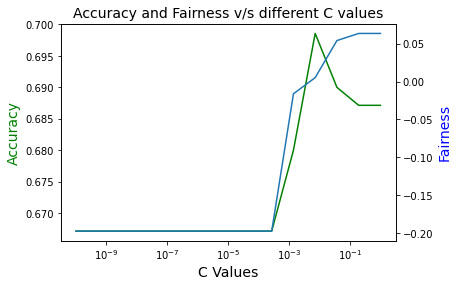

In [ ]:
#Creating plot for how accuracy and fairness varies with the 'C' values
fig,ax = plt.subplots()
ax.plot(c_val,dict_metric['accuracy'], color = 'green')
plt.xscale('log')
ax.set_xlabel('C Values', fontsize = 14)
ax.set_ylabel('Accuracy',color = 'green', fontsize = 14)
ax2 = ax.twinx()
ax2.plot(c_val,dict_metric['eq_opp_diff'])
ax2.set_ylabel('Fairness',color = 'blue', fontsize = 14)
plt.title('Accuracy and Fairness v/s different C values', fontsize = 14)

plt.show()


In [ ]:
c_val[2]
c_val[3]

print('C value for maiximum accuracy : {} \nC value for maximum fairness : {}'.format(c_val[2],c_val[3]))

C value for maiximum accuracy : 0.0372759372031494 
C value for maximum fairness : 0.0071968567300115215


In [ ]:
#calculating accuracy and fairness(TPR difference) for the model with highest accuracy (reweighed)
a,f = test_hyper_par_reweighing(0.0372759372031494)#passing C value corresponding to highest accuracy 
print('Accuracy : {} \nFairness : {}'.format(a,f))

Accuracy : 0.68 
Fairness : 0.08241758241758246


In [ ]:
#calculating accuracy and fairness(TPR difference) for the model with highest fairness (reweighed)
a,f = test_hyper_par_reweighing(0.0071968567300115215)#passing C value corresponding to highest fairness
print('Accuracy : {} \nFairness : {}'.format(a,f))

Accuracy : 0.68 
Fairness : 0.08241758241758246


# Additional Section 

In [ ]:
#Importing random forest classifier
from sklearn.ensemble import RandomForestClassifier

## Random Forest Classifier on **Adult Data**

In [ ]:
#Setting the privilaged and unprevilaged groups and splitting the data into train and test
privileged_groups = [{'sex': 1}]
unprivileged_groups = [{'sex': 0}]
dataset_orig = load_preproc_data_adult(['sex'])
train, test = dataset_orig.split([0.7], shuffle=True)


In [ ]:
#Random forest model is defined
model = RandomForestClassifier(n_estimators=100)

### Task 1

In [ ]:
#Function for calculating accuracy and fairness using random forest model
def test_randomforest(train = train): 
  scale_orig = StandardScaler()
  X_train = scale_orig.fit_transform(train.features)
  y_train = train.labels.ravel()

  X_test = scale_orig.transform(test.features) 
  y_test = test.labels.ravel()

  model.fit(X_train,y_train)
  predictions = model.predict(X_test)

  test_pred = test.copy()
  test_pred.labels = predictions

  accuracy = sum(predictions==y_test)/len(y_test)

  metric = ClassificationMetric(test, test_pred, unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)

  eq_opp_diff = (metric.equal_opportunity_difference())

  return accuracy,eq_opp_diff


In [ ]:
accuracy, eq_opp_diff = test_randomforest(train = train)
print('Accuracy : {} \nFairness : {}'.format(accuracy,eq_opp_diff))

Accuracy : 0.8092540776632772 
Fairness : -0.466078697421981


## Task 2

In [ ]:
#Function for calculating accuracy and fairness using random forest model with reweighing
def test_randomforest_reweighing(train = train):
  scale_orig = StandardScaler()
  X_train = scale_orig.fit_transform(train.features)
  y_train = train.labels.ravel()

  X_test = scale_orig.transform(test.features) 
  y_test = test.labels.ravel()

  RW = Reweighing(unprivileged_groups=unprivileged_groups,privileged_groups=privileged_groups)# Reweighing the train data

  train_fold_reweighed = RW.fit_transform(train)


  model.fit(X_train,y_train,sample_weight=train_fold_reweighed.instance_weights)#The sample weights are set as the instance weights of the train data
  predictions = model.predict(X_test)

  test_pred = test.copy()
  test_pred.labels = predictions

  accuracy = sum(predictions==y_test)/len(y_test)#Accuracy

  metric = ClassificationMetric(test, test_pred, unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)

  eq_opp_diff = (metric.equal_opportunity_difference())#Fairness metric value

  return accuracy, eq_opp_diff

In [ ]:
accuracy, eq_opp_diff = test_randomforest_reweighing(train = train)
print('Accuracy : {} \nFairness : {}'.format(accuracy,eq_opp_diff))

Accuracy : 0.7936941240701563 
Fairness : -0.04330850386287488


## Random Forest Classifier on **German Data**

In [ ]:
#Privilaged groups and unprivilaged groups are set accordingly and the data is split into train and test with the ratio 0.7
privileged_groups = [{'age': 1}]
unprivileged_groups = [{'age': 0}]
dataset_orig = load_preproc_data_german(['age'])
train, test = dataset_orig.split([0.7], shuffle=True)

### Task 1

In [ ]:
#calculating accuracy and fairness using random forest
accuracy, eq_opp_diff = test_randomforest(train = train)

In [ ]:
print('Accuracy : {} \nFairness : {}'.format(accuracy,eq_opp_diff))

Accuracy : 0.7033333333333334 
Fairness : -0.15724637681159415


### Task 2

In [ ]:
#Calculating accuracy and fairness using random forest with reweighing
accuracy, eq_opp_diff = test_randomforest_reweighing(train = train)

In [ ]:
print('Accuracy : {} \nFairness : {}'.format(accuracy,eq_opp_diff))

Accuracy : 0.6933333333333334 
Fairness : -0.11304347826086947
